<center>
<img src="FIFA-19-Background-1-768x401.jpg" />
    
## Aprendizaje No Supervisado 2020 DiploDatos
    Laura Alonso Alemany, Ana Georgina Flesia y Valeria Rulloni
## Agrupamiento con el FIFA 2019 dataset
    
Material basado en notas de Ana Georgina Flesia bajo los términos y condiciones de la licencia [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/), a su vez basado de material de [SilveMel](https://www.kaggle.com/karangadiya/fifa19/downloads/data.csv/comments) y otros.

### Indice de temas
1. [Inicialización del entorno](#1.-Inicialización-del-entorno)
2. [Preparación de los datos](#2.-Preparación-de-los-datos)
3. [Visualizacion con embeddings:tSNE](#3.-Visualizacion-con-embeddings:tSNE)
4. [Componentes Principales](#4.-Componentes-Principales)
5. [Clustering](#5.-Clustering)


## 1.-Inicialización-del-entorno

Empezamos cargando algunas herramientas para cargar los datos y manipularlos.

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

In [2]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns

## 2.-Preparación-de-los-datos

Cargamos los datos bajados de la database de [Kaggle](https://www.kaggle.com/karangadiya/fifa19) como 'data.csv'. 

In [129]:
df=pd.read_csv("players_20.csv")
df['prefered_position'] = df.player_positions.str.split(',').apply(lambda l: l[0])

# 3.-Visualizacion-con-embeddings:tSNE

**t-SNE : t-distributed Stochastic Neighbor Embedding.**

t-SNE es una herramienta para visualizar datos altamente dimensionales. 

Los "proyecta" en menos dimensiones (2D o 3D) manteniendo la distancia entre ellos.

Consideramos: filas/observaciones $x_i$ y $x_j$ (jugador i y jugador j) en $R^n$.

Comienza convirtiendo distancias entre puntos (observaciones) en probabilidades condicionales. 

$d(x_i,x_j) \rightarrow p(x_j|x_i)$, 

Y luego va acomodando puntos asociados (en el plano 2D o el espacio 2D) que "ajusten" las probabilidades condicionales.

$x'_i$ y $x'_j$ en $R^2$  (para el jugador i y jugador j ) $p(x'_j|x'_i) \leftrightarrow d(x'_i,x'_j)$, 

$p(x_j|x_i) \approx p(x'_j|x'_i)$

El ajuste consiste en minimizar la divergencia the Kullback-Leibler entre las probabilidades condicionales establecidas en el espacio de mayor dimension y las determinadas en el espacio de menor dimension. 


El modelo de distribución de probabilidad es el de t-Student 

t-SNE tiene una función de costo que no es convexa, por lo cual diferentes inicializaciones pueden dar diferentes resultados.


In [97]:
n_sne=4000 #elegir numero pequeño para agilidad en el cálculo luego
df_sne=df.loc[:n_sne]

skills_ratings = [#'age', 'height_cm', 'weight_kg',
       #'potential', #'value_eur', 'wage_eur',
       #'weak_foot', 'skill_moves',
       #'release_clause_eur',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes',]
X=df_sne[skills_ratings]
X.fillna(0, inplace=True)
print('dimensión del espacio de los datos: ', len(skills_ratings))

dimensión del espacio de los datos:  46


In [98]:
X.head(5)

,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,87.0,92.0,92.0,96.0,39.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,90.0,93.0,82.0,89.0,35.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,91.0,85.0,87.0,95.0,32.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,0.0,0.0,0.0,0.0,0.0,0.0,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,91.0,83.0,86.0,94.0,35.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8


Trasnformamos el espacio de dim 34 en un espacio de dimensión 2 (n_components=2)

In [99]:
from sklearn import (manifold, decomposition)

import time
time_start = time.time()

tsne = manifold.TSNE(n_components=2, verbose=1,perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4001 samples in 0.089s...
[t-SNE] Computed neighbors for 4001 samples in 1.291s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4001
[t-SNE] Computed conditional probabilities for sample 2000 / 4001
[t-SNE] Computed conditional probabilities for sample 3000 / 4001
[t-SNE] Computed conditional probabilities for sample 4000 / 4001
[t-SNE] Computed conditional probabilities for sample 4001 / 4001
[t-SNE] Mean sigma: 13.422005
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.773071
[t-SNE] KL divergence after 1000 iterations: 1.689834
t-SNE done! Time elapsed: 26.08390522003174 seconds


**El resultado (X_tsne) se guarda en una arreglo numpy**

de tamaño:

cantidad de filas = cantidad de jugadores considerados = n_tsne y

cantidad de columnas= n_components = 2 

In [100]:
X_tsne[1990:2000] #diez jugadores

array([[-33.40232  , -16.385258 ],
       [ 26.537992 ,   1.989571 ],
       [-75.99624  ,   6.8400297],
       [-67.519875 ,   8.468876 ],
       [-48.233307 ,   1.3151138],
       [-76.2432   ,  14.1769705],
       [-41.006413 ,  -2.833104 ],
       [ 24.394388 ,  10.239416 ],
       [ 52.569233 ,  29.977766 ],
       [  7.0435076,  -8.465607 ]], dtype=float32)

**GRAFICAMOS: Scatter plot** 

Las variables que usamos para el scatterplot son las 2 componentes dadas por tSNE

agregamos los nombres de los ckack ("Overall" más de 85) y vemos una tercera variable recorriendo los puntos sobre el gráfico

In [101]:
data=[]
bool_crack=df_sne["overall"] > 85 #diferenciamos a los mejores jugadores

#graficamos los datos en el espacio transformado: las dos componentes tsne

graf1 = go.Scatter(x=X_tsne[:,0], y=X_tsne[:,1],
                           mode='markers',
                        text=df_sne.loc[:,'prefered_position'], #'Height', 'Weight', 'Club', 'Age', 'Name','Position'
                           marker=dict(
                                size=5)
                           )

crack =go.Scatter(x=X_tsne[bool_crack,0], y=X_tsne[bool_crack,1],name='Los más mejores',
                      text=df_sne.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[graf1,crack]

layout = go.Layout(title="Visualización de la base en el espacio tsne",titlefont=dict(size=20),
                xaxis=dict(title='componente 1'),
                yaxis=dict(title='componente 2'),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

#iplot(fig)
plot(fig)

'temp-plot.html'

**INTERPRETACIÓN**

Un poco de análisis visual supervisado usando tsne

Ponemos a prueba la intuición o preconcepto de que los jugadores se agrupan en el espacio de las habilidades (transformado/reducido por tsne) según la posición... 

Creamos una nueva columna con 4 categorias de posiciones:

In [102]:
forwards=['ST','CF','RW','LW']
midfielders=['CAM','RM','CM','RM','LM','CDM']
defenders=['RWB','RB','CB','LB','LWB']
goalkeepers=['GK']

def pos2(position):
    if position in forwards:
        return 'Forward'
    
    elif position in midfielders:
        return 'Midfielder'
    
    elif position in defenders:
        return 'Defender'
    
    elif position in goalkeepers:
        return 'GK'
    
    else:
        return 'nan'

In [103]:
df_sne["Position2"]=df_sne["prefered_position"].apply(lambda x: pos2(x))

df_sne["Position2"].value_counts()

Midfielder    1572
Defender      1218
Forward        834
GK             377
Name: Position2, dtype: int64

**GRAFICAMOS** 

Las variables que usamos para el scatterplot son las 2 componentes dadas por tSNE

diferenciamos usando vectores booleanos: para cada posición y si es un ckack 

In [104]:
bool_striker= df_sne["Position2"] == 'Forward'
bool_midfielder= df_sne["Position2"] == 'Midfielder'
bool_defender= df_sne["Position2"] == 'Defender'
bool_gk= df_sne["Position2"] == 'GK'

bool_crack=df_sne["overall"] > 85

palette=['navy','red','#A2D5F2','orange','green','pink']  
data=[]

striker =go.Scatter(x=X_tsne[bool_striker,0], y=X_tsne[bool_striker,1],name='Striker',
                      text=df_sne.loc[bool_striker,'short_name'],
                      opacity=0.9,marker=dict(color=palette[2],size=5),mode='markers')

midfielder =go.Scatter(x=X_tsne[bool_midfielder,0], y=X_tsne[bool_midfielder,1],name='Midfielder',
                      text=df_sne.loc[bool_midfielder,'short_name'],
                      opacity=0.6,marker=dict(color=palette[1],size=5),mode='markers')

defender =go.Scatter(x=X_tsne[bool_defender,0], y=X_tsne[bool_defender,1],name='Defender',
                      text=df_sne.loc[bool_defender,'short_name'],
                      opacity=0.7,marker=dict(color=palette[3],size=5),mode='markers')

gk =go.Scatter(x=X_tsne[bool_gk,0], y=X_tsne[bool_gk,1],name='GK',
                      text=df_sne.loc[bool_gk,'short_name'],
                      opacity=0.4,marker=dict(color=palette[4],size=5),mode='markers')

crack =go.Scatter(x=X_tsne[bool_crack,0], y=X_tsne[bool_crack,1],name='Top player',
                      text=df_sne.loc[bool_crack,'short_name'],textfont=dict(family='sans serif',color='black',size=16),
                      opacity=0.9,mode='text')

data=[striker,midfielder,defender,gk,crack]

layout = go.Layout(title="t-SNE - Fifa Players",titlefont=dict(size=20),
                autosize=False, width=1150,height=1150)

fig = go.Figure(data=data, layout=layout)

#iplot(fig)
plot(fig)

'temp-plot.html'

Como conclusión, podemos ver que en este espacio 2D es realmente muy evidente la separación de los arqueros del resto de los jugadores (lo cual es lógico pues sus habilidades son muy diferentes, lo vimos también en la primera semana de clases en dimensión 34, graficando de a dos variable por vez). 

El agrupamiento visual, en este espacio, de los jugadores no es tan evidente pues los clusters no son disconexos.

Las posiciones no explican tan claramente los clusters encontrados 

Una explicación posible puede ser porque hay jugadores ambivalentes que unen los espacios entre defensa, mediocampo y ataque. 

Habrá otra explicación?? 

Que otras variables (que no estamos graficando) pueden explicar los grupos? 

En este espacio tsne ... es decir usando "X_tsne[:,0]" y "X_tsne[:,0]"
Cuantos grupos encontrará Mean Shift? o cuales k-medias? hacerlo para el práctico con los datos FIFA2020

**Utilizando otro agrupamiento como se planteo en *ntb_clustering_2***

In [105]:
forwards=['ST','CF','RW','LW']
ataque = ['ST','CF','RW','LW','CAM','LM','RM']
defensa = ['RWB','RB','CB','LB','LWB','CDM','CM']

def pos3(position):
    if position in ataque:
        return 'ATAQUE'
    
    elif position in defensa:
        return 'DEFENSA'
    
    elif position in goalkeepers:
        return 'GK'
    
    else:
        return 'nan'

In [106]:
df_sne["Position3"]=df_sne["prefered_position"].apply(lambda x: pos3(x))

df_sne["Position3"].value_counts()

DEFENSA    2044
ATAQUE     1580
GK          377
Name: Position3, dtype: int64

**GRAFICAMOS** 

Las variables que usamos para el scatterplot son las 2 componentes dadas por tSNE

diferenciamos usando vectores booleanos: para cada posición y si es un ckack 

In [107]:
bool_ataque= df_sne["Position3"] == 'ATAQUE'
bool_defensa= df_sne["Position3"] == 'DEFENSA'
bool_gk= df_sne["Position3"] == 'GK'

bool_crack=df_sne["overall"] > 85

palette=['navy','red','#A2D5F2','orange','green','pink']  
data=[]

ataque =go.Scatter(x=X_tsne[bool_ataque,0], y=X_tsne[bool_ataque,1],name='Ataque',
                      text=df_sne.loc[bool_ataque,'short_name'],
                      opacity=0.9,marker=dict(color=palette[2],size=5),mode='markers')

defensa =go.Scatter(x=X_tsne[bool_defensa,0], y=X_tsne[bool_defensa,1],name='Defensa',
                      text=df_sne.loc[bool_defensa,'short_name'],
                      opacity=0.6,marker=dict(color=palette[1],size=5),mode='markers')

gk =go.Scatter(x=X_tsne[bool_gk,0], y=X_tsne[bool_gk,1],name='GK',
                      text=df_sne.loc[bool_gk,'short_name'],
                      opacity=0.4,marker=dict(color=palette[4],size=5),mode='markers')

crack =go.Scatter(x=X_tsne[bool_crack,0], y=X_tsne[bool_crack,1],name='Top player',
                      text=df_sne.loc[bool_crack,'short_name'],textfont=dict(family='sans serif',color='black',size=16),
                      opacity=0.9,mode='text')

data=[ataque,defensa,gk,crack]

layout = go.Layout(title="t-SNE - Fifa Players",titlefont=dict(size=20),
                autosize=False, width=1150,height=1150)

fig = go.Figure(data=data, layout=layout)

#iplot(fig)
plot(fig)

'temp-plot.html'

Al igual que en la notebook anterior dividiendo el tres clusters el solapamiento es mucho menor y mas interpretable

## Clustering con K-Means de los resultados de T-SNE

In [108]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

# Número de clusters buscado
n_clust = 3

km = KMeans(n_clusters=n_clust)
km.fit(X_tsne)

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster / Inertia: ', km.inertia_)

Suma de los cuadrados de las distancias al cluster / Inertia:  2311522.5


Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

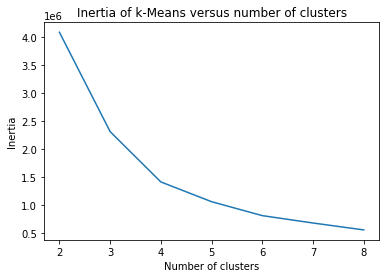

In [109]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
min_ = 2
max_ = 9
scores = [KMeans(n_clusters=i).fit(X_tsne).inertia_ for i in range(min_,max_)]

from matplotlib import pyplot as plt
plt.plot(np.arange(min_, max_), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [110]:
df_sne['kmeans_3'] = km.labels_


In [111]:
data=[]
bool_crack=df_sne["overall"] > 85
bool_no_crack=df_sne["overall"]<86


df_skills=pd.DataFrame(X_tsne).rename(columns={0:'c1',1:'c2'})
#Eligo dos números entre 0 y  de n_skills-1
skill_1='c1'
skill_2='c2' #skills_ratings[25]


kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_sne.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Ckacks!!',
                      text=df_sne.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

plot(fig)

'temp-plot.html'

In [112]:
cl_count = df_sne.groupby(['kmeans_3']).sofifa_id.count()
cl_rel = 100*cl_count/len(df_sne)
pd.DataFrame({'Cantidad de muestras por cluster': cl_count, 'Tamaño relativo del cluster (representatividad) [%] ':cl_rel})

,Cantidad de muestras por cluster,Tamaño relativo del cluster (representatividad) [%]
kmeans_3,,
0,2027,50.662334
1,1595,39.865034
2,379,9.472632


In [113]:
# Las posiciones son muchas, asique las resumo en 4 -> arquero, defensor, mediocampo, delantero
df_sne['pref_pos_1'] =  df_sne.prefered_position
df_sne['pref_pos_1'] =  df_sne['pref_pos_1'].apply(lambda x: 'ARQUERO' if x in ['GK'] else x)
df_sne['pref_pos_1'] =  df_sne['pref_pos_1'].apply(lambda x: 'DELANTERO' if x in ['ST','CF','RW','LW'] else x)
df_sne['pref_pos_1'] =  df_sne['pref_pos_1'].apply(lambda x: 'MEDIOCAMPO' if x in ['CAM','RM','CM','RM','LM','CDM'] else x)
df_sne['pref_pos_1'] =  df_sne['pref_pos_1'].apply(lambda x: 'DEFENSOR' if x in ['RWB','RB','CB','LB','LWB'] else x)

df_sne['pref_pos_2'] = df_sne.prefered_position
# Las posiciones son muchas, asique las resumo en 4 -> arquero, defensor, mediocampo, delantero
df_sne.pref_pos_2 =  df_sne.pref_pos_2.apply(lambda x: 'ARQUERO' if x in ['GK'] else x)
df_sne.pref_pos_2 =  df_sne.pref_pos_2.apply(lambda x: 'ATAQUE' if x in ['ST','CF','RW','LW','CAM','LM','RM'] else x)
df_sne.pref_pos_2 =  df_sne.pref_pos_2.apply(lambda x: 'DEFENSA' if x in ['RWB','RB','CB','LB','LWB','CDM','CM'] else x)
pd.crosstab(df_sne.pref_pos_2,df_sne.kmeans_3)

kmeans_3,0,1,2
pref_pos_2,,,
ARQUERO,0,0,377
ATAQUE,88,1492,0
DEFENSA,1939,103,2


Utilizando TSNE como entrada para kmeans no da buenos resultados, no solo que no puede diferenciar cuatro cluster bien definidos, sino que nisiuiera se pueden obtener los clusters de la notebook anterior, es decir que tampoco puede diferenciar correctamente entre los clusters **arquero, ataque y defensa** como se muestra en la tabla de contingencia anterior existe mas solapamiento entre clusters que utilizando todos los skills

## Clustering con MeanShift de los resultados de T-SNE

In [119]:
from sklearn.cluster import KMeans,MeanShift,estimate_bandwidth
from sklearn import decomposition
from sklearn.preprocessing import MinMaxScaler

bw = estimate_bandwidth(X_tsne)
print ('Estimated BW: {}'.format(bw))
ms = MeanShift(bandwidth=bw, bin_seeding=False)

ms.fit(X_tsne)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Numero estimado de clusters para Mean Shift : %d" % n_clusters_)
df_sne['MeanShift'] = ms.labels_

Estimated BW: 38.47781632359632
Numero estimado de clusters para Mean Shift : 3


In [120]:
data=[]
bool_crack=df_sne["overall"] > 85
bool_no_crack=df_sne["overall"]<86


df_skills=pd.DataFrame(X_tsne).rename(columns={0:'c1',1:'c2'})
df_n=df_sne
#Eligo dos números entre 0 y  de n_skills-1
skill_1='c1'
skill_2='c2' #skills_ratings[25]




MeanShift_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

plot(fig)

'temp-plot.html'

In [243]:
cl_count = df_sne.groupby(['MeanShift']).sofifa_id.count()
cl_rel = 100*cl_count/len(df_sne)
pd.DataFrame({'Cantidad de muestras por cluster': cl_count, 'Tamaño relativo del cluster (representatividad) [%] ':cl_rel})

,Cantidad de muestras por cluster,Tamaño relativo del cluster (representatividad) [%]
MeanShift,,
0,2099,52.461885
1,1523,38.065484
2,379,9.472632


In [122]:
pd.crosstab(df_sne.pref_pos_2,df_sne.MeanShift)

MeanShift,0,1,2
pref_pos_2,,,
ARQUERO,0,0,377
ATAQUE,106,1474,0
DEFENSA,1993,49,2


Mean Shift tiene un comportamiento claramente superior que analizando todas las skills, ahora es capaz de encontrar tres cluesters muy similares a los de kmeans incluso mejora un poco los resultados de kmeans con tsne.

# 4.-Componentes-Principales 

PCA
Para reducción de dimensión
de n dimensiones a m dimensiones con 'm<<n'

Pseudo-ejemplo intuitivo:
Via láctea en 3D  https://youtu.be/WNASVRwdf9Q  o https://www.youtube.com/watch?v=S7GiZMVNB20                                        
a Via láctea en 2D (la proyección en 2D que mejor describe la dispersión de los datos/estrellas)

<center>
<img src="hubble-13-ngc-1300-barred-spiral-galaxy-1920.jpg" />

**Variables de desempeño (skills_ratings)**

**Retiramos arqueros y jugadores con bajo ranking**


In [165]:
n_acp=18000

df_acp=df.loc[:n_acp]
df_acp=df_acp[(df_acp["prefered_position"]!='GK')&(df['overall']>70)]
df_acp.fillna(0,inplace=True)

skills_ratings = [#'age', 'height_cm', 'weight_kg',
       #'potential', #'value_eur', 'wage_eur',
       #'weak_foot', 'skill_moves',
       #'release_clause_eur',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes',]

#otros skills_ratings ! sacamos las habilidades de los arqueros

Restringimos los datos a las variables numéricas que consideramos

In [166]:
X=df_acp[skills_ratings] # Datos para proyectar
print('los datos tienen dimesión n= ',len(skills_ratings))

los datos tienen dimesión n=  46


**Se computan las componentes principales**

-cuando se usa *decomposition.PCA* : 

La descomposición PCA del sklearn centra los datos pero no los normaliza (input data is centered but not scaled for each feature before applying the SVD)

por eso **estandarizamos primero**

In [167]:
from sklearn import preprocessing
std_scale=preprocessing.StandardScaler().fit(X)
X_scaled=std_scale.transform(X) # numpyarray normalizado por columna

In [168]:
print(X_scaled[0:2])
X.head(2)

[[ 1.3915718   2.28100237  2.96886868  2.84551206 -1.07466303 -0.52075526
   0.          0.          0.          0.          0.          0.
   1.85191727  2.22591719  0.50579762  3.10516247  2.04822158  2.51241012
   2.10810769  2.43109902  2.66408211  3.18353021  1.64821701  1.12843689
   1.84130682  4.14284295  2.07189558  1.52906387 -0.08406758  0.22655488
  -0.19387423  2.1898988  -1.4663244  -0.88327707  2.03265645  2.40441334
   1.23931568  3.66320434 -1.29845475 -1.00858184 -1.34122585 -1.3448052
   0.09414922  1.26933893  0.96458131 -0.78491947]
 [ 1.63580846  2.35521709  1.8233006   2.06984609 -1.30007499  0.93257788
   0.          0.          0.          0.          0.          0.
   1.55947807  2.16540639  2.10231142  1.74199744  1.98481151  1.7868031
   1.30894567  1.31434768  1.17375414  2.6471945   1.4928247   1.69221681
   1.36330133  4.32209798  0.25161067  2.3556585   2.17528741  1.22615709
   0.66487084  2.12277809 -0.34105661 -1.43450959  2.09945366  1.42414494
   2.

,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,87.0,92.0,92.0,96.0,39.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,90.0,93.0,82.0,89.0,35.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11


**DESCOMPOSICIÓN PCA**

En la descomposición podemos elegir n_components para quedarnos con una cantidad chica de componentes 

la idea es que sean "bastante" menos que la dimensión de lo datos pero 

que describan un buen porcentaje de la dispersión de los datos

In [169]:
from sklearn import decomposition
pca=decomposition.PCA(n_components=4) #elegimos 2, 3 o 4 pero pueden ser más, 

pca.fit(X_scaled) #input data is centered but not scaled for each feature before applying the SVD

# proporción de varianza
print('proporción de varianza por componente: ', pca.explained_variance_ratio_)
# proporción de varianza acumulada
print ('proporción de varianza por componente acumulada: ', pca.explained_variance_ratio_.cumsum())

X_projected=pca.transform(X_scaled) #numpy array
print ('tamaño de los datos: ', X_projected.shape)


proporción de varianza por componente:  [0.38181707 0.14432532 0.09226197 0.06089413]
proporción de varianza por componente acumulada:  [0.38181707 0.5261424  0.61840436 0.67929849]
tamaño de los datos:  (4316, 4)


In [170]:
print (X_projected[0:5])#5 primeros jugadores, n_components

[[-10.66815197  -3.78340155   1.77552225  -0.9543984 ]
 [ -8.48046952  -2.14650992   3.69225588  -4.56862614]
 [-10.38050054  -2.17899793   0.46406977  -0.57868876]
 [ -9.60266995  -2.34493046   0.47956767  -1.00355683]
 [ -7.20138507  -6.06376964   2.35702326  -1.01583945]]


In [171]:
pcs=pca.components_  #"composición" de las primeras componentes, 
print(pcs)  # el aporte/pesos de las variables: skills_ratings

[[-1.53010739e-01 -2.25492406e-01 -1.92249038e-01 -2.35508751e-01
   1.63614310e-01  1.36726640e-01  2.11450627e-26  1.87445064e-27
   3.97700394e-28 -1.49351442e-28  3.23786764e-29 -9.19195657e-29
  -1.77709054e-01 -2.16405472e-01  1.25927327e-01 -1.32462854e-01
  -2.05115602e-01 -2.29759251e-01 -2.06452039e-01 -1.77538428e-01
  -5.84978632e-02 -2.13222224e-01 -1.63767380e-01 -1.36645072e-01
  -1.96733735e-01 -7.67556857e-02 -1.70807555e-01 -1.66674539e-01
   6.27309611e-02 -4.27808672e-02  1.47198156e-01 -2.09239156e-01
   1.28402978e-01  1.48189378e-01 -2.21776908e-01 -2.03618980e-01
  -1.73025259e-01 -9.37944084e-02  1.52357966e-01  1.54768153e-01
   1.57005697e-01  5.42354107e-03  3.84528183e-03  1.24810577e-03
   1.23806190e-02  6.82300195e-03]
 [ 6.77073568e-02  2.30247607e-02 -2.48562393e-01 -8.38809651e-02
  -3.03044933e-01 -1.31367613e-01 -6.13406320e-23  1.98472630e-24
   7.99013218e-25 -2.64493649e-25  5.72012570e-26 -1.79459551e-25
  -1.65597217e-01  7.44944530e-02 -1.6699

El siguiente gráfico muestra la composición de los pesos de las dos primeras componentes principales. 

In [160]:
#Graph 1
data=[]

for i, (x,y) in enumerate(zip(pcs[0,:],pcs[1,:])):
    graph=go.Scatter(x=[0,x],y=[0,y],text=X.columns[i],
                     mode='lines+markers+text',textposition='top left',textfont=dict(family='sans serif',size=15))
    data.append(graph)

layout = go.Layout(title="ACP - Fifa Skills",titlefont=dict(size=20),
            xaxis=dict(title='Componente 1'),
            yaxis=dict(title='Componente 2'),
            autosize=False, width=1050,height=750,
            showlegend=False)

fig = go.Figure(data=data, layout=layout)

plot(fig)


'temp-plot.html'

Se crea el jugador perfecto para ver a donde se ubica en nuestra visualización, se lo agrega a los datos normalizados y a las componentes ya calculadas (sin usarlo).

In [172]:
MachineGunDict={'short_name':'MachineGun','overall':99}
for skills in skills_ratings:
    MachineGunDict[skills]=99
    
#Lo agregamos a la base:
df_acp=df_acp.append(MachineGunDict,ignore_index=True)
X=df_acp[skills_ratings] # Datos sin estandarizar
X_scaled=std_scale.transform(X) # volvemos a normalizar con el dato agregado 
#pero con la normalización de la base sin el dato nuevo
X_projected=pca.transform(X_scaled) # volvemos a proyectar pero con el dato nuevo

**Graficamos a los jugadores usando las dos primeras componentes de PCA, proyectamos los datos (de dim 29) en ese espacio de dimensión 2**

Identificamos a MachineGun y a un jugador en particular, por ejemplo, Lio Messi: 

In [176]:
#Graph 2
#Choose your player
recherche_joueur=df_acp["short_name"]=='L. Messi'

bool_crack=df_acp["overall"] > 85
bool_no_crack=df_acp["overall"]<86
bool_machinegun=df_acp["short_name"]=='MachineGun'

palette=['navy','red','#A2D5F2','orange','green','pink']  
data=[]

acp_crack =go.Scatter(x=X_projected[bool_crack,0], y=X_projected[bool_crack,1],name='Crack',
                      text=df_acp.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=15,color='black'),
                      opacity=0.9,marker=dict(color=palette[2],size=7),mode='markers+text')

acp_no_crack =go.Scatter(x=X_projected[bool_no_crack,0], y=X_projected[bool_no_crack,1],name='Average player',
                         text=df_acp.loc[bool_no_crack,'short_name'],
                         opacity=0.6,marker=dict(color=palette[1],size=3),mode='markers')

acp_machinegun =go.Scatter(x=X_projected[bool_machinegun,0], y=X_projected[bool_machinegun,1],name='Perfect player',
                           textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=0.6,marker=dict(color=palette[3],size=30),mode='markers+text')


joueur_recherche =go.Scatter(x=X_projected[recherche_joueur,0], y=X_projected[recherche_joueur,1],name='Searched player',
                           text=df_acp.loc[recherche_joueur,'short_name'],
                            textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=1,marker=dict(color=palette[4],size=40),mode='markers+text')

data=[acp_no_crack,acp_crack,acp_machinegun,joueur_recherche]

layout = go.Layout(title="ACP - Fifa Players",titlefont=dict(size=20),
                xaxis=dict(title='Componente 1'),
                yaxis=dict(title='componente 2'),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

plot(fig)

'temp-plot.html'

Se puede comparar dos equipos y ver los perfiles de los jugadores en las dos primeras componentes.

In [178]:
teamA='Liverpool'
teamB='Manchester United'

bool_teamA=df_acp["club"]==teamA
bool_teamB=df_acp["club"]==teamB

palette=['navy','red','#A2D5F2','orange','green','pink','grey']  
data=[]

acp_teamA =go.Scatter(x=X_projected[bool_teamA,0], y=X_projected[bool_teamA,1],name=teamA,
                      text=df_acp.loc[bool_teamA,'short_name'],
                      textfont=dict(family='sans serif',size=20,color='black'),
                      opacity=0.7,marker=dict(color=palette[1],size=10),mode='markers+text')

acp_teamB =go.Scatter(x=X_projected[bool_teamB,0], y=X_projected[bool_teamB,1],name=teamB,
                      text=df_acp.loc[bool_teamB,'short_name'],
                      textfont=dict(family='sans serif',size=20,color='black'),
                      opacity=0.7,marker=dict(color=palette[4],size=10),mode='markers+text')

acp_all =go.Scatter(x=X_projected[:,0], y=X_projected[:,1],name='All',
                         text=df_acp.loc[:,'short_name'],
                         opacity=0.3,marker=dict(color=palette[6],size=3),mode='markers')


data=[acp_teamA,acp_teamB,acp_all]

layout = go.Layout(title="ACP - {} vs {}".format(teamA,teamB),titlefont=dict(size=20),
                xaxis=dict(title='F1'),
                yaxis=dict(title='F2'),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

plot(fig)

'temp-plot.html'

# 5 .-Clustering

**Trabajo en grupo**: Veamos ahora que agrupamientos podemos hacer de los jugadores usando las dos/tres o cuatro primeras componentes. 

Presentar este ejercicio (con comentarios) pero con los datos FIFA2020 para el práctico

In [230]:
##Hay que quitar MachineGun para Clustering
df_acp=df.loc[:n_acp]
df_acp=df_acp[(df_acp["prefered_position"]!='GK')&(df['overall']>70)]
df_acp.fillna(0,inplace=True)
X=df_acp[skills_ratings] # Datos sin estandarizar
X_scaled=std_scale.transform(X) # volvemos a normalizar (ya estaba ajustada)
X_projected=pca.transform(X_scaled) #volvemos a proyectar 
print('dimensiones de la base proyectada:', X_projected.shape)

dimensiones de la base proyectada: (4316, 4)


k-medias y visualizar los clusters encontrados en las dos primeras componentes

## Clustering con K-Means de los resultados de PCA

In [231]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

# Número de clusters buscado
n_clust = 3

km = KMeans(n_clusters=n_clust)
km.fit(X_projected)

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster / Inertia: ', km.inertia_)

Suma de los cuadrados de las distancias al cluster / Inertia:  52511.39877798515


Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

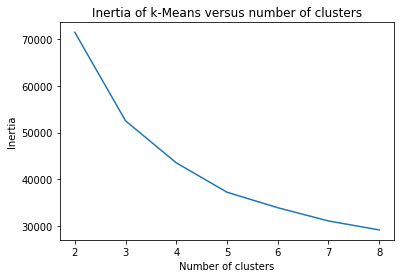

In [232]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
min_ = 2
max_ = 9
scores = [KMeans(n_clusters=i).fit(X_projected).inertia_ for i in range(min_,max_)]

from matplotlib import pyplot as plt
plt.plot(np.arange(min_, max_), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [233]:
df_acp['kmeans_pca'] = km.labels_


In [234]:
pd.DataFrame(X_projected).rename(columns={0:'c1',1:'c2',2:'c3',3:'c4'})

,c1,c2,c3,c4
0,-10.668152,-3.783402,1.775522,-0.954398
1,-8.480470,-2.146510,3.692256,-4.568626
2,-10.380501,-2.178998,0.464070,-0.578689
3,-9.602670,-2.344930,0.479568,-1.003557
4,-7.201385,-6.063770,2.357023,-1.015839
...,...,...,...,...
4311,-1.176321,1.417328,-0.504983,2.748819
4312,-1.637706,2.656093,2.596965,0.434145
4313,0.917951,-1.711664,0.480323,1.087081
4314,2.023467,-0.577484,0.390639,0.282121


In [235]:
data=[]
df_gr = df_acp
bool_crack=df_gr["overall"] > 85
bool_no_crack=df_gr["overall"] < 86


df_skills=pd.DataFrame(X_projected).rename(columns={0:'c1',1:'c2',2:'c3',3:'c4'})
#Eligo dos números entre 0 y  de n_skills-1
skill_1='c1'
skill_2='c2' #skills_ratings[25]


kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_gr.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )


data=[kmean_clusters]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

plot(fig)

'temp-plot.html'

In [236]:
cl_count = df_acp.groupby(['kmeans_pca']).sofifa_id.count()
cl_rel = 100*cl_count/len(df_acp)
pd.DataFrame({'Cantidad de muestras por cluster': cl_count, 'Tamaño relativo del cluster (representatividad) [%] ':cl_rel})

,Cantidad de muestras por cluster,Tamaño relativo del cluster (representatividad) [%]
kmeans_pca,,
0,1714,39.712697
1,870,20.157553
2,1732,40.129750


In [237]:
# Las posiciones son muchas, asique las resumo en 4 -> arquero, defensor, mediocampo, delantero
df_acp['pref_pos_1'] =  df_acp.prefered_position
df_acp['pref_pos_1'] =  df_acp['pref_pos_1'].apply(lambda x: 'ARQUERO' if x in ['GK'] else x)
df_acp['pref_pos_1'] =  df_acp['pref_pos_1'].apply(lambda x: 'DELANTERO' if x in ['ST','CF','RW','LW'] else x)
#df_acp['pref_pos_1'] =  df_acp['pref_pos_1'].apply(lambda x: 'MEDIOCAMPO' if x in ['CAM','RM','CM','RM','LM','CDM'] else x)
df_acp['pref_pos_1'] =  df_acp['pref_pos_1'].apply(lambda x: 'DEFENSOR' if x in ['RWB','RB','CB','LB','LWB'] else x)

df_acp['pref_pos_2'] = df_acp.prefered_position
# Las posiciones son muchas, asique las resumo en 4 -> arquero, defensor, mediocampo, delantero
df_acp.pref_pos_2 =  df_acp.pref_pos_2.apply(lambda x: 'ARQUERO' if x in ['GK'] else x)
df_acp.pref_pos_2 =  df_acp.pref_pos_2.apply(lambda x: 'ATAQUE' if x in ['ST','CF','RW','LW','CAM','LM','RM'] else x)
df_acp.pref_pos_2 =  df_acp.pref_pos_2.apply(lambda x: 'DEFENSA' if x in ['RWB','RB','CB','LB','LWB','CDM','CM'] else x)

pd.crosstab(df_acp.pref_pos_2,df_acp.kmeans_pca)

kmeans_pca,0,1,2
pref_pos_2,,,
ATAQUE,1681,2,183
DEFENSA,33,868,1549


Utilizando el esquema que se muestra antes y considerando que no hay arqueros, kmeans funciona mejor dividiendo en 3 clusters con 4 componentes principales y planteando lo siguiente, grupo 0: ataque, grupo 1:defensa, grupo 3: defensa, es decir que dos clusters corresponden al mismo label. 

Mean Shift y visualizar en las dos primeras componentes 

## Clustering con MeanShift de los resultados de PCA

In [252]:
from sklearn.cluster import KMeans,MeanShift,estimate_bandwidth
from sklearn import decomposition
from sklearn.preprocessing import MinMaxScaler

# tomo solo las dos primeras componentes
X_proj_2 = X_projected[:,:2]

bw = estimate_bandwidth(X_tsne)
print ('Estimated BW: {}'.format(bw))
ms = MeanShift(bandwidth=3, bin_seeding=False)

ms.fit(X_proj_2)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Numero estimado de clusters para Mean Shift : %d" % n_clusters_)
df_acp['MeanShift'] = ms.labels_

Estimated BW: 38.47781632359632
Numero estimado de clusters para Mean Shift : 2


In [253]:
data=[]
bool_crack=df_acp["overall"] > 85
bool_no_crack=df_acp["overall"] < 86


df_skills=pd.DataFrame(X_proj_2).rename(columns={0:'c1',1:'c2'})
df_n=df_sne
#Eligo dos números entre 0 y  de n_skills-1
skill_1='c1'
skill_2='c2' #skills_ratings[25]

MeanShift_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_acp.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

data=[MeanShift_clusters]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

plot(fig)

'temp-plot.html'

In [254]:
pd.crosstab(df_sne.pref_pos_2,df_acp.MeanShift)

MeanShift,0,1
pref_pos_2,,
ATAQUE,174,1406
DEFENSA,2024,20


forzando a MeanShift con un bandwidth de 3 sobre las dos primera componentes principales se obtienen buenos resultados como se muestra en la tabla de contingencia anterior los clusters tienen poco solapamiento, en conclusion MeanShift funciona mucho mejor sobre componentes principales que cualquier otro embeding visto en la cursada.

In [ ]:
#clusters2= ms.labels_

In [255]:
data=[]
bool_crack=df_acp["overall"] > 85
bool_no_crack=df_acp["overall"]<86

kmean_clusters = go.Scatter(x=X_projected[:,0], y=X_projected[:,1],
                           mode='markers',
                        text=df_acp.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

acp_crack =go.Scatter(x=X_projected[bool_crack,0], y=X_projected[bool_crack,1],name='Top players',
                      text=df_acp.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,acp_crack]

layout = go.Layout(title="ACP + Clustering Mean Shift ",titlefont=dict(size=20),
                xaxis=dict(title='Componente 1'),
                yaxis=dict(title='Componente 2'),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

plot(fig)

'temp-plot.html'

In [256]:
#df_clusters=df_acp.copy()
#df_clusters['kmeans'] = km.labels_
#df_clusters['MeanShift'] = ms.labels_
#df_clusters.head()